**Solution by B. Senkovskiy**

# 1. Load and explore the data

**Load the data**

In [96]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
simulation_train = pd.read_pickle('hvac_simulation_train_system.pkl')
exogenous_train = pd.read_pickle('hvac_simulation_train_exogenous.pkl') # this is our X
simulation_test = pd.read_pickle('hvac_simulation_test_system.pkl')
exogenous_test = pd.read_pickle('hvac_simulation_test_exogenous.pkl') 

In [98]:
# summary of simulation_train dataframe
simulation_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2880 entries, 2017-03-01 00:00:00 to 2017-03-30 23:45:00
Freq: <pandas._libs.properties.CachedProperty object at 0x000001D8108D6140>
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RoomTemp                     2880 non-null   float64
 1   ReturnWaterTemp              2880 non-null   float64
 2   SupplyAirTempBeforeMixing    2880 non-null   float64
 3   SupplyAirTempAfterMixing     2880 non-null   float64
 4   SupplyWaterTempAfterMixing   2880 non-null   float64
 5   SupplyWaterTempBeforeMixing  2880 non-null   float64
 6   GasConsumptionDelta          2880 non-null   float64
 7   SetpointTempBoiler           2880 non-null   float64
 8   ActuatorDamper               2880 non-null   float64
 9   ActuatorMixingValve          2880 non-null   float64
dtypes: float64(10)
memory usage: 247.5 KB


In [99]:
simulation_train.head()

,RoomTemp,ReturnWaterTemp,SupplyAirTempBeforeMixing,SupplyAirTempAfterMixing,SupplyWaterTempAfterMixing,SupplyWaterTempBeforeMixing,GasConsumptionDelta,SetpointTempBoiler,ActuatorDamper,ActuatorMixingValve
2017-03-01 00:00:00,19.7,17.4,16.9,14.0,18.2,54.3,2341.7,55.3,0.6,0.0
2017-03-01 00:15:00,20.0,28.8,25.9,17.3,32.7,54.6,9195.0,55.2,0.8,0.1
2017-03-01 00:30:00,20.8,32.5,28.8,18.0,37.3,55.2,11509.8,55.3,0.8,0.2
2017-03-01 00:45:00,21.3,30.8,27.6,18.4,34.9,55.6,9636.9,55.3,0.8,0.1
2017-03-01 01:00:00,21.4,27.1,24.9,18.4,30.0,55.6,6591.8,55.3,0.8,0.1


In [100]:
simulation_train.shape

(2880, 10)

In [101]:
# summary of exogenous_train dataframe
exogenous_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2880 entries, 2017-03-01 00:00:00 to 2017-03-30 23:45:00
Freq: <pandas._libs.properties.CachedProperty object at 0x000001D8108D6140>
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SolarRadiation  2880 non-null   float64
 1   OutsideAirTemp  2880 non-null   float64
 2   Occupancy       2880 non-null   float64
dtypes: float64(3)
memory usage: 90.0 KB


In [102]:
exogenous_train.head()

,SolarRadiation,OutsideAirTemp,Occupancy
2017-03-01 00:00:00,0.0,2.0,0.0
2017-03-01 00:15:00,0.0,2.0,0.0
2017-03-01 00:30:00,0.0,2.0,0.0
2017-03-01 00:45:00,0.0,2.0,0.0
2017-03-01 01:00:00,0.0,2.0,0.0


In [103]:
exogenous_train.shape

(2880, 3)

The data are in time scale with 15 minutes step. Let's define the time scale variables:

In [104]:
# one hour:
hour = 4

# day scale
day = int(24*hour)

# week scale
week = 7*day

**Visualize the data**

First, check the simulation data (simulation_train). Here, for clarity, only one week is shown

<Figure size 432x288 with 0 Axes>

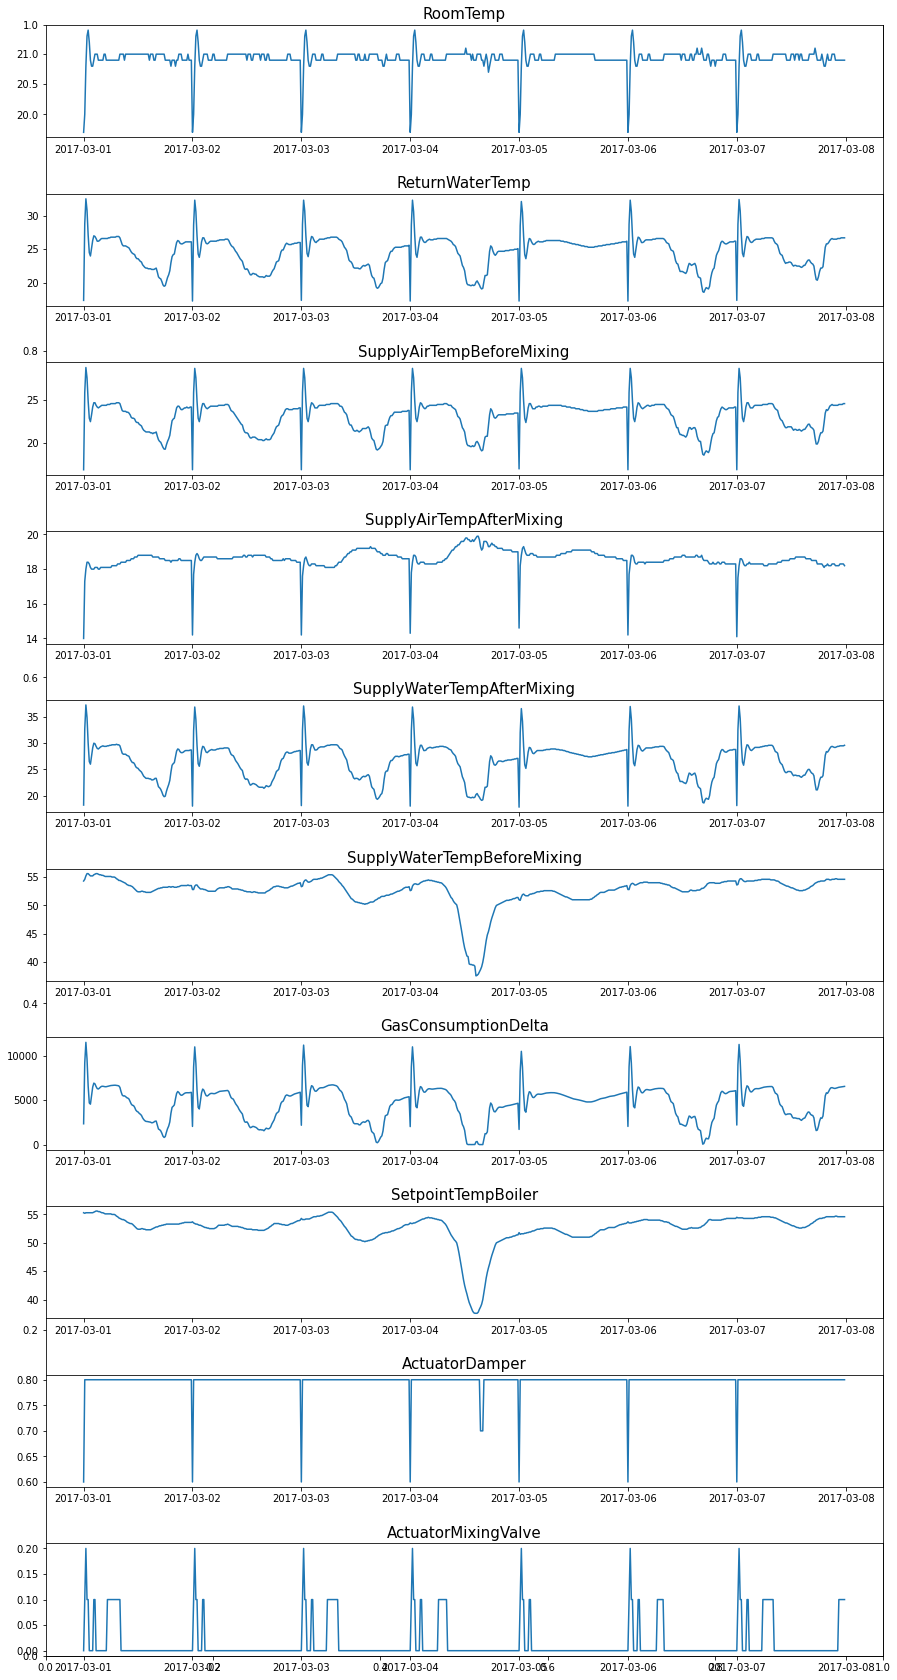

In [105]:
sub = 1
plt.figure()
f, axs = plt.subplots(figsize=(15, 30))
for i in simulation_train.columns:
    f.subplots_adjust(hspace=0.5)
    ax = f.add_subplot(len(simulation_train.columns), 1, sub)
    ax.set_title(i, fontsize = 15)
    ax.plot(simulation_train[i].iloc[0:week])
    sub += 1
plt.show()

Plot the exogenous data (exogenous_train):

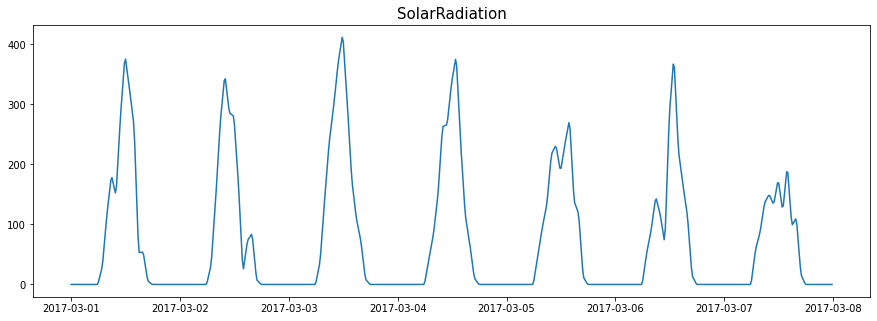

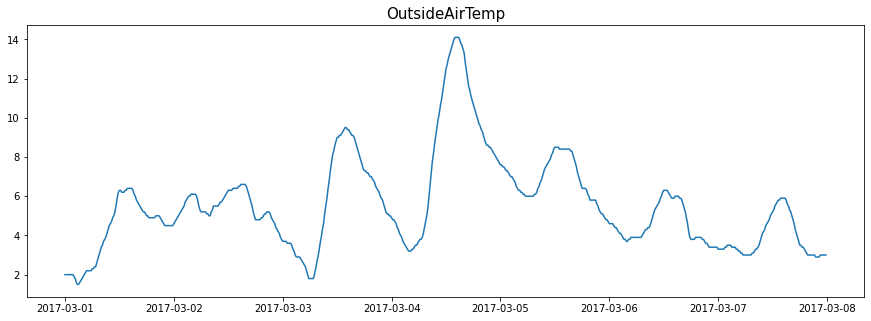

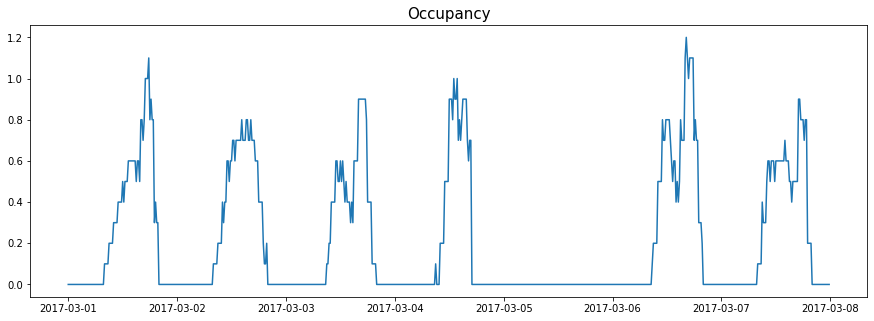

In [106]:
for i in exogenous_train.columns:
    plt.figure(figsize=(15,5))
    plt.title(i, fontsize = 15)
    plt.plot(exogenous_train[i].iloc[:672])
    plt.show()

In [107]:
list(simulation_train.columns)

['RoomTemp',
 'ReturnWaterTemp',
 'SupplyAirTempBeforeMixing',
 'SupplyAirTempAfterMixing',
 'SupplyWaterTempAfterMixing',
 'SupplyWaterTempBeforeMixing',
 'GasConsumptionDelta',
 'SetpointTempBoiler',
 'ActuatorDamper',
 'ActuatorMixingValve']

**Observations:**


1. Simulation data have spikes at the begining of each day. Similar spikes are not presenting in the exogenous data. These spikes always have the same amplitude and duration, and most likely are associated with a reboot of the electronics after 24 hours. In some data the spikes are not very pronounsed (SupplyWaterTempBeforeMixing and SetpointTempBoiler), but in most cases they contribute a lot. Therefore, to build a predictive model, it would be better to remove the spikes from the data. If needed, we can always add them back to the data.

2. In the exogenous data we see zero Occupancy on the 5th of March, and at the same day we see much smaller variations in the folowing simulation data: 'ReturnWaterTemp', 'SupplyAirTempBeforeMixing', 'SupplyWaterTempAfterMixing', 'GasConsumptionDelta'. It is clear that these data are strongly affected by the Occupancy. They are very similar to each other (strongly correlated), and therefore it makes sense to use similar model parameters for them.

3. We can also select another group from the simulation data, which are similar to each other: 'SupplyWaterTempBeforeMixing' and 'SetpointTempBoiler'. These data corelates very well with the 'OutsideAirTemp' data (that is not surprising) from exogenous dataframe. For example, all these data have peaks on 4th of March.

To illustrate the afermentioned correlations between different variables in simulation data, we can also show them in the heatmap:

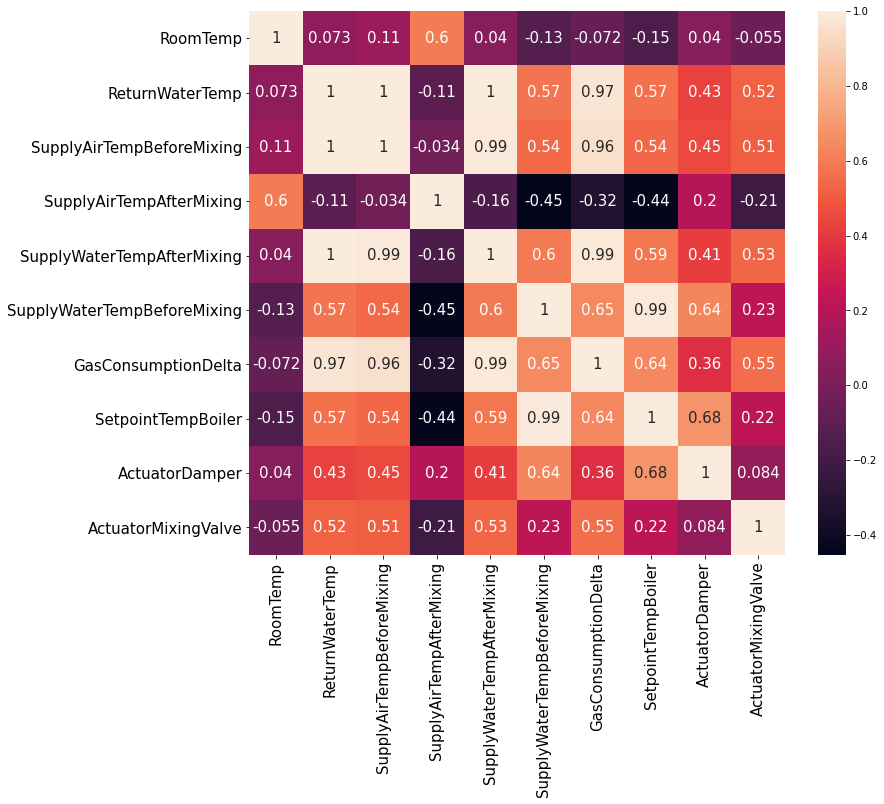

In [108]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 10))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.labelsize = 5
ax = sns.heatmap(simulation_train.corr(), annot=True, annot_kws={"fontsize":15})

# 2. Build the first model

Let's build the first model to predict the 'SupplyWaterTempBeforeMixing' and 'SetpointTempBoiler' data from the simulation dataframe. This looks like a straightforward task. Indeed, an increase in air temperature leads to the evaporation of water and, as a consequence, to its cooling. This exlains why dips in the simulation data ['SupplyWaterTempBeforeMixing', 'SetpointTempBoiler'] correlate with peaks in the exogenous data ['OutsideAirTemp']. We can try to use only the ['OutsideAirTemp'] data for the first model.

**Predict 'SupplyWaterTempBeforeMixing'**

In [109]:
# Make a convinient notations
X_train = exogenous_train.copy()
y_train = simulation_train.copy()
X_test = exogenous_test.copy()
y_test = simulation_test.copy()

Let's try xgboost regressor

In [110]:
from xgboost import XGBRegressor

We will estimate a cross validation score and also an R^2 score

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

First try the model with only one parameter random_state=0, to always have the same results

In [112]:
model_XGB = XGBRegressor(random_state=0)

In [113]:
X_train.columns

Index(['SolarRadiation', 'OutsideAirTemp', 'Occupancy'], dtype='object')

Try to use the model without any preliminary data treatment.

Convert X_train and X_test to numpy array and reshape to put as a matrix for XGB Regressor.

In [114]:
X_train_OutsideAirTemp = X_train['OutsideAirTemp'].values.reshape(X_train.shape[0],1)
X_test_OutsideAirTemp = X_test['OutsideAirTemp'].values.reshape(X_train.shape[0],1)

This model should work very well with the data:

In [115]:
cross_val_score(model_XGB, X_train_OutsideAirTemp, y_train['SupplyWaterTempBeforeMixing'],cv=5)

array([0.99428207, 0.99397203, 0.98888478, 0.9977542 , 0.81656554])

Fit the model and make predictions:

In [116]:
model_XGB.fit(X_train_OutsideAirTemp, y_train['SupplyWaterTempBeforeMixing'], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
prediction = model_XGB.predict(X_test_OutsideAirTemp)

In [197]:
prediction

array([49.483067, 49.96231 , 50.11793 , ..., 51.20637 , 51.309525,
       51.440315], dtype=float32)

Convert the predicted numpy array to the pandas dataframe with time as index, similar to the test data

In [118]:
y_predict_SupplyWaterTempAfterMixing = pd.DataFrame(prediction, 
                                                    index = y_test['SupplyWaterTempBeforeMixing'].index,
                                                    columns={'SupplyWaterTempBeforeMixing'})

In [119]:
y_predict_SupplyWaterTempAfterMixing.head()

,SupplyWaterTempBeforeMixing
2017-04-01 00:00:00,49.483067
2017-04-01 00:15:00,49.962311
2017-04-01 00:30:00,50.117931
2017-04-01 00:45:00,50.233398
2017-04-01 01:00:00,50.396221


Check the R^2 score

In [120]:
r2_score(y_test['SupplyWaterTempBeforeMixing'], y_predict_SupplyWaterTempAfterMixing)

0.9876419215884088

Plot the results

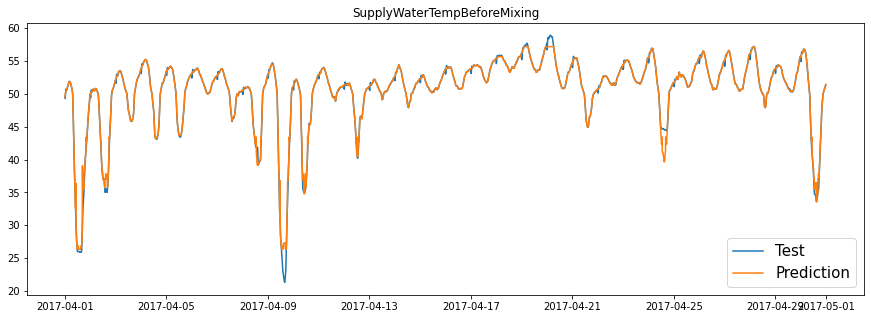

In [121]:
plt.figure(figsize=(15,5))
plt.plot(y_test['SupplyWaterTempBeforeMixing'], label = "Test" )
plt.plot(y_predict_SupplyWaterTempAfterMixing, label = "Prediction")
plt.legend(fontsize = 15)
plt.title('SupplyWaterTempBeforeMixing')
plt.show()

This is an impressive result, without tuning of hyper-parameters and data scaling. 
But it is not surprising, since the water temperature indeed depends on the air temperature.

**Fit with multiple outputs**

Based on the 'OutsideAirTemp' we need to predict not only 'SupplyWaterTempBeforeMixing', but also 'SetpointTempBoiler'. Therefore, it would be convinient to use Multi Output Regressor as a wraper for our model.

This is our multidimensional train data:

In [122]:
y_train[['SupplyWaterTempBeforeMixing','SetpointTempBoiler']].shape

(2880, 2)

In [123]:
from sklearn.multioutput import MultiOutputRegressor

In [124]:
regressor_2D = MultiOutputRegressor(model_XGB).fit(X_train_OutsideAirTemp,
                                                   y_train[['SupplyWaterTempBeforeMixing',
                                                            'SetpointTempBoiler']].values, verbose=False)

This is our prediction for both variables:

In [125]:
prediction_2D = regressor_2D.predict(X_test_OutsideAirTemp)

In [126]:
prediction_2D.shape

(2880, 2)

In [127]:
# Convert our prediction back to the pandas dataframe with corresponding time-index and columns

prediction_2D = pd.DataFrame(prediction_2D, 
                             index = y_test['SupplyWaterTempBeforeMixing'].index,
                             columns={'SupplyWaterTempBeforeMixing','SetpointTempBoiler'})

In [128]:
prediction_2D.head()

,SupplyWaterTempBeforeMixing,SetpointTempBoiler
2017-04-01 00:00:00,49.483067,49.487053
2017-04-01 00:15:00,49.962311,49.979126
2017-04-01 00:30:00,50.117931,50.100971
2017-04-01 00:45:00,50.233398,50.256977
2017-04-01 01:00:00,50.396221,50.397202


Now we have predicted both 'SupplyWaterTempBeforeMixing' and 'SetpointTempBoiler'.

Let's check the score:

In [129]:
r2_score(y_test[['SupplyWaterTempBeforeMixing','SetpointTempBoiler']], prediction_2D)

0.9935012286438148

Plot the reults:

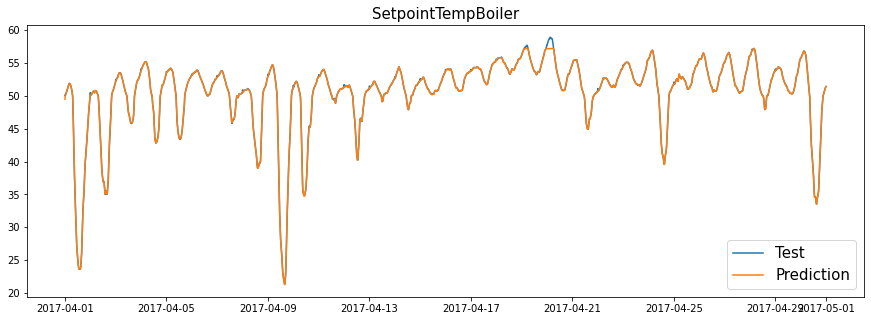

In [130]:
plt.figure(figsize=(15,5))
plt.plot(y_test['SetpointTempBoiler'], label = "Test" )
plt.plot(prediction_2D['SetpointTempBoiler'], label = "Prediction")
plt.legend(fontsize = 15)
plt.title('SetpointTempBoiler', fontsize = 15)
plt.show()

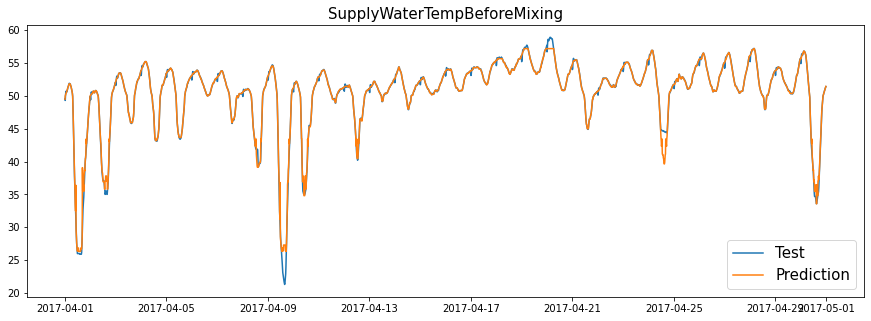

In [131]:
plt.figure(figsize=(15,5))
plt.plot(y_test['SupplyWaterTempBeforeMixing'], label = "Test" )
plt.plot(prediction_2D['SupplyWaterTempBeforeMixing'], label = "Prediction")
plt.legend(fontsize = 15)
plt.title('SupplyWaterTempBeforeMixing', fontsize = 15)
plt.show()

We can see that two variables ['SupplyWaterTempBeforeMixing','SetpointTempBoiler'] we can predict very well just knowing the air temperature ['OutsideAirTemp'].

# 3. Modify the data

Now, we will try to predict the simulation data with spikes. As we can see from the 'RoomTemp' data, electronics stabilize during the ~ first 2.5 hours of each day. We don't have to predict these spikes since they are sistematic and are not related to the external conditions (exogenous data). We modify the data as follow: replace the first two and a half hours (encoded into the variable time_warming_up, as shown below) by the data from the previous day (1/2) and the current day (1/2). We always can add the difference related to the spikes into the data later if needed.

From the obtained dataset let's focus on the folowing data, having similar behaviour: 

['ReturnWaterTemp', 'SupplyAirTempBeforeMixing', 'SupplyWaterTempAfterMixing', 'GasConsumptionDelta']

**Modification of the first two hours in each day**

In [132]:
y_train_modified = y_train.copy()

# first 2.5 hours scale
time_warming_up = int(2.5*hour)

# Loop to mofify time_warming_up time (2.5 hours) in all columns. 
# Only for the first day we replace 2.5 hours by the folowing 2.5 hours, 
# for the rest of the data we replace by half from previous day and half from the present day 
for i in y_train_modified.columns:
    for j in range(0, y_train_modified[i].size, day):
        if j == 0:
            y_train_modified[i][j:j+time_warming_up+1] = y_train_modified[i][j+time_warming_up+1:j+2*(time_warming_up+1)]
        else:
            y_train_modified[i][j:j+time_warming_up+1] = pd.concat([y_train_modified[i][j-int(time_warming_up/2)-1:j],
                                    y_train_modified[i][j+time_warming_up+1:j+2*(time_warming_up)+1-int(time_warming_up/2)]])

Let's look at the modified data

<Figure size 432x288 with 0 Axes>

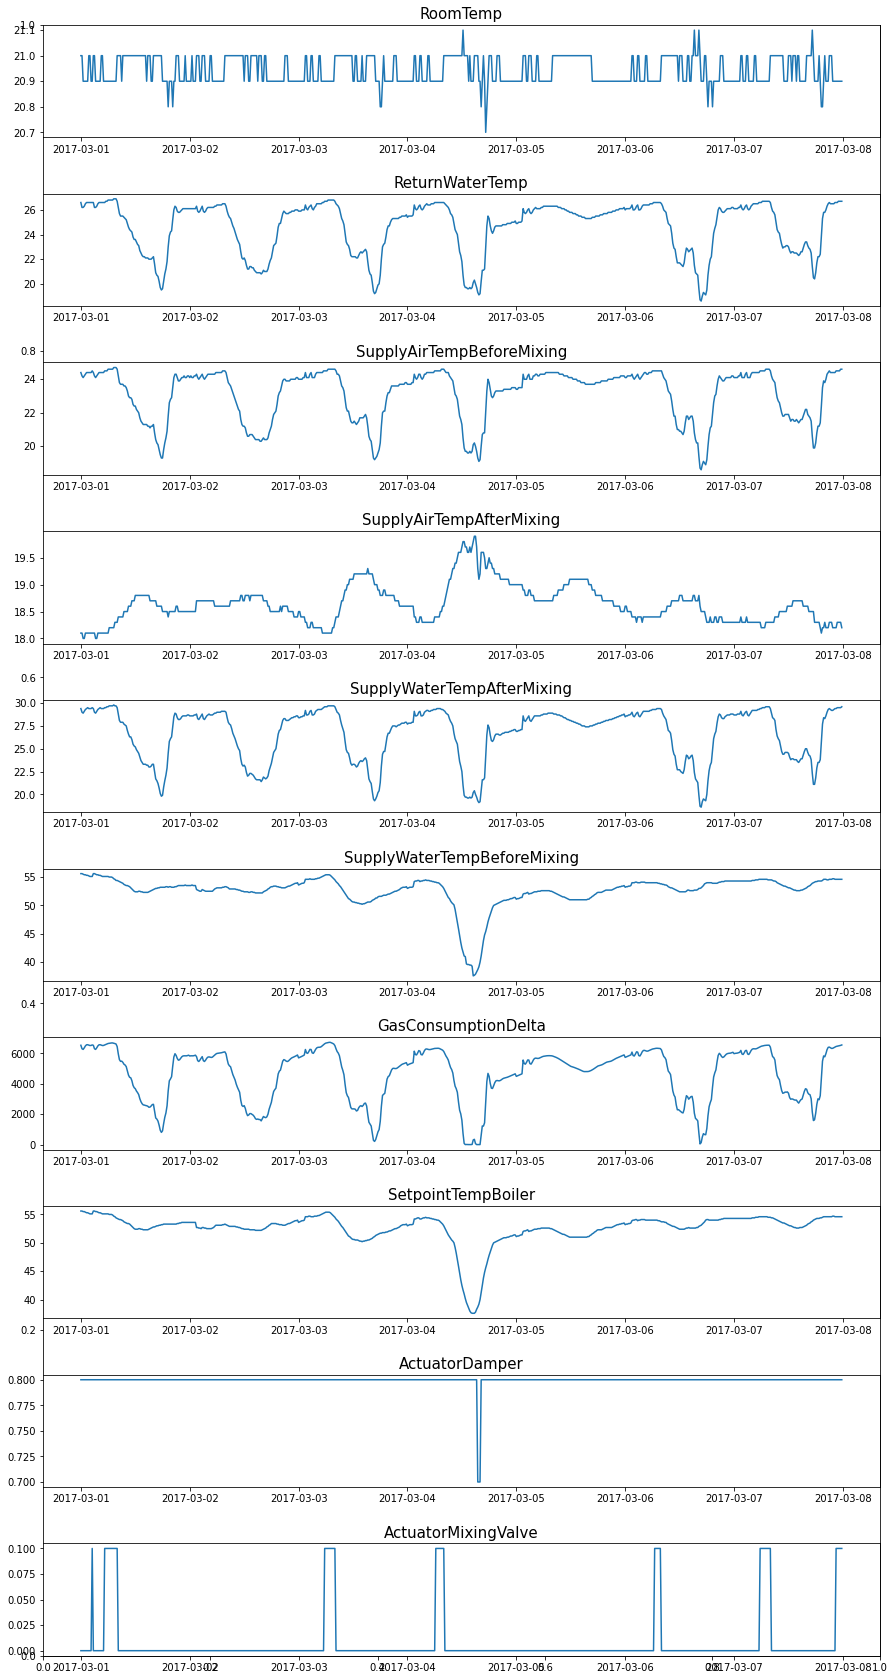

In [133]:
sub = 1
plt.figure()
f, axs = plt.subplots(figsize=(15, 30))
for i in y_train_modified.columns:
    f.subplots_adjust(hspace=0.5)
    ax = f.add_subplot(len(y_train_modified.columns), 1, sub)
    ax.set_title(i, fontsize = 15)
    ax.plot(y_train_modified[i].iloc[0:672])
    sub += 1
plt.show()

<Figure size 432x288 with 0 Axes>

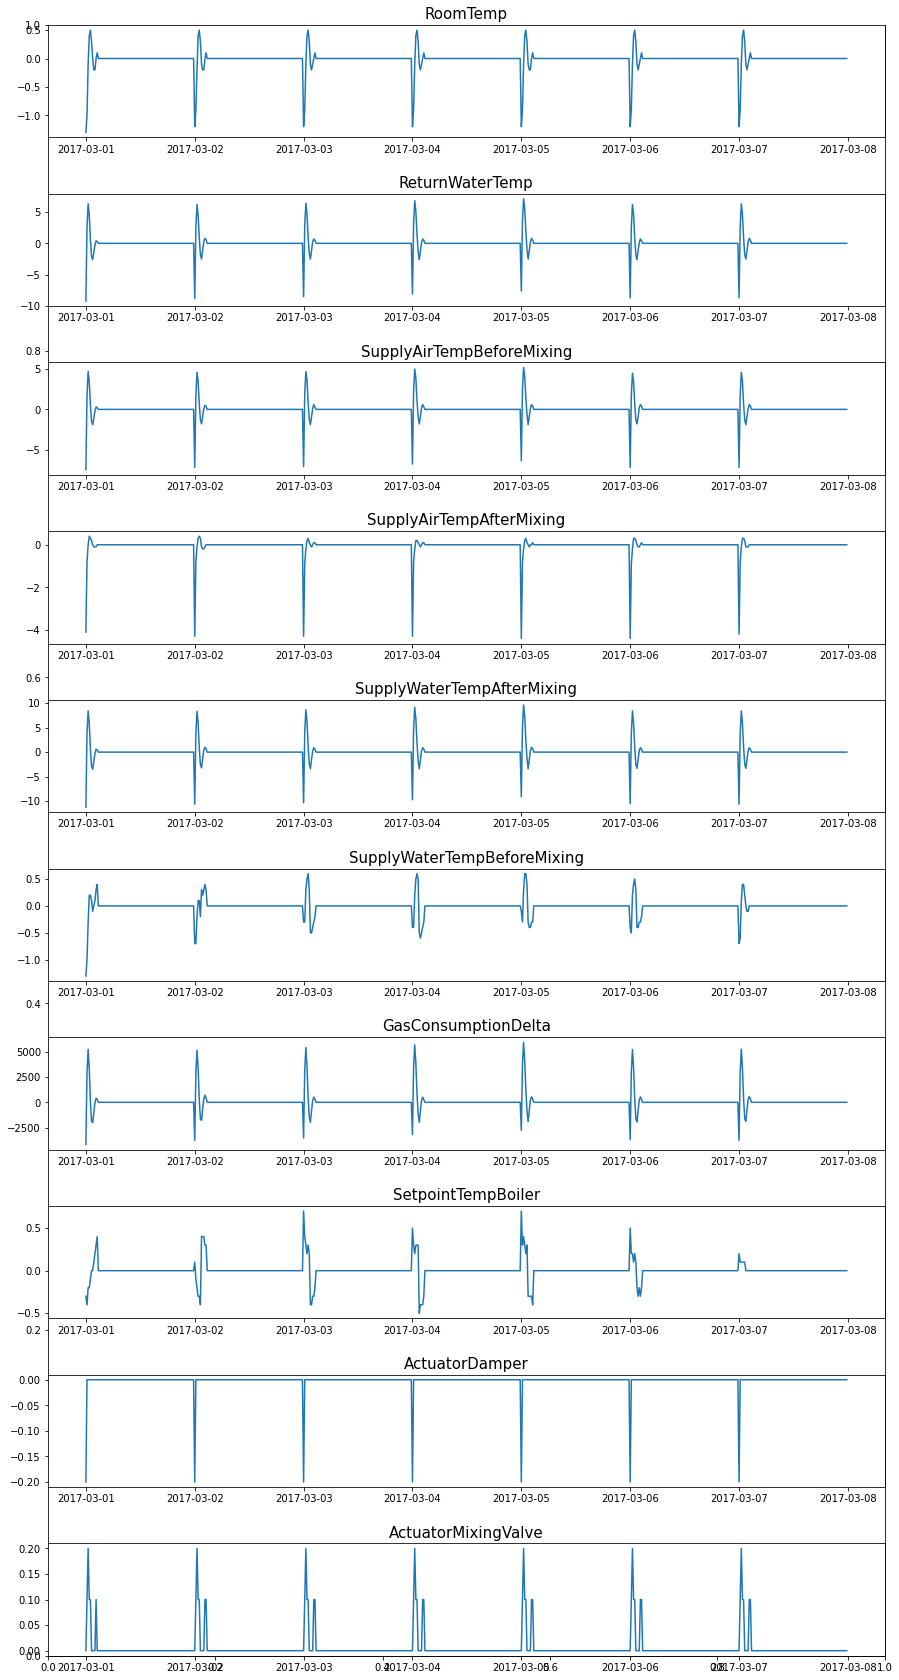

In [198]:
sub = 1
plt.figure()
f, axs = plt.subplots(figsize=(15, 30))
for i in y_train_modified.columns:
    f.subplots_adjust(hspace=0.5)
    ax = f.add_subplot(len(y_train_modified.columns), 1, sub)
    ax.set_title(i, fontsize = 15)
    ax.plot(y_train[i].iloc[0:week]-y_train_modified[i].iloc[0:week])
    sub += 1
plt.show()

On the plots of ['ReturnWaterTemp', 'SupplyAirTempBeforeMixing', 'SupplyWaterTempAfterMixing', 'GasConsumptionDelta'] we still see small preiodic double-peak structure and not perfect connection between days. In order not to make a complicated data treatment, let's leave them as they are, since these peaks are not very strong. 

**Use model with multidimentional output**

We will now look at the folowing data: 

['ReturnWaterTemp', 'SupplyAirTempBeforeMixing', 'SupplyWaterTempAfterMixing', 'GasConsumptionDelta']

For these data we will now use **full** X_train dataset

To calculate the R^2 score, we should also modify the y_test data (remove spikes):

In [134]:
y_test_modified = y_test.copy()
for i in y_train_modified.columns:
    for j in range(0, y_test_modified[i].size, day):
        if j == 0:
            y_test_modified[i][j:j+time_warming_up+1] = y_test_modified[i][j+time_warming_up+1:j+2*(time_warming_up+1)]
        else:
            y_test_modified[i][j:j+time_warming_up+1] = pd.concat([y_test_modified[i][j-int(time_warming_up/2)-1:j],
                                    y_test_modified[i][j+time_warming_up+1:j+2*(time_warming_up)+1-int(time_warming_up/2)]])

In [135]:
# Take only the columns of interest:

y_train_multiple = y_train_modified[['ReturnWaterTemp', 'SupplyAirTempBeforeMixing', 
                                     'SupplyWaterTempAfterMixing', 'GasConsumptionDelta']]

y_test_multiple = y_test_modified[['ReturnWaterTemp', 'SupplyAirTempBeforeMixing',
                                   'SupplyWaterTempAfterMixing', 'GasConsumptionDelta']]

Use Multi Output Regressor to fit and predict:

In [136]:
regressor_multiple = MultiOutputRegressor(model_XGB).fit(X_train.values, y_train_multiple.values, verbose=False)

In [137]:
prediction_multiple = regressor_multiple.predict(X_test)

The cross validation score:

In [138]:
cross_val_score(regressor_multiple, X_train, y_train_multiple,cv=5)

array([0.81784924, 0.83615916, 0.8902067 , 0.73254458, 0.7291734 ])

Convert predictions to the pandas datafreame:

In [139]:
prediction_multiple = pd.DataFrame(prediction_multiple, index = y_test.index,
                                                   columns=y_train_multiple.columns)

Get R^2 score:

In [140]:
r2_score(y_test_multiple, prediction_multiple)

0.7970900770600026

Let's slighly improve the score by changing the parameters of the model: 

In [141]:
list(model_XGB.get_params().keys())

['objective',
 'base_score',
 'booster',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'gamma',
 'gpu_id',
 'importance_type',
 'interaction_constraints',
 'learning_rate',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'missing',
 'monotone_constraints',
 'n_estimators',
 'n_jobs',
 'num_parallel_tree',
 'random_state',
 'reg_alpha',
 'reg_lambda',
 'scale_pos_weight',
 'subsample',
 'tree_method',
 'validate_parameters',
 'verbosity']

Let's use the Grid Search to tune a few hyperparameters:

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameters = {
              'learning_rate': [0.01, 0.02, 0.03], 
              'max_depth': [1,2,3,4],
              'min_child_weight': [2,3,4],
              'n_estimators': [300, 400, 500]}

xgb_grid = GridSearchCV(model_XGB, 
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

# Check on the 'ReturnWaterTemp' data:
xgb_grid.fit(X_train,
         y_train_multiple['ReturnWaterTemp'])

xgb_grid.best_score_
xgb_grid.best_params_

Fitting 2 folds for each of 108 candidates, totalling 216 fits


{'learning_rate': 0.02,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 400}

This is our improved model with best hyperparameters:

In [144]:
model_XGB_tuned = XGBRegressor(n_estimators = 400, 
                               learning_rate = 0.02, 
                               max_depth = 2, 
                               min_child_weight = 3, 
                               random_state=0 )

Use it to fit and predict:

In [145]:
regressor_tuned = MultiOutputRegressor(model_XGB_tuned).fit(X_train.values, y_train_multiple.values, verbose=False)

In [146]:
prediction_tuned = regressor_tuned.predict(X_test)

In [147]:
cross_val_score(regressor_tuned, X_train, y_train_multiple,cv=5)

array([0.88858784, 0.87441898, 0.90971188, 0.77425564, 0.71837918])

In [148]:
prediction_tuned = pd.DataFrame(prediction_tuned, index = y_test.index,
                                                   columns=y_train_multiple.columns)

The R2 score is now a bit better:

In [149]:
r2_score(y_test_multiple, prediction_tuned)

0.8233160667559563

Let's plot the results:

<Figure size 432x288 with 0 Axes>

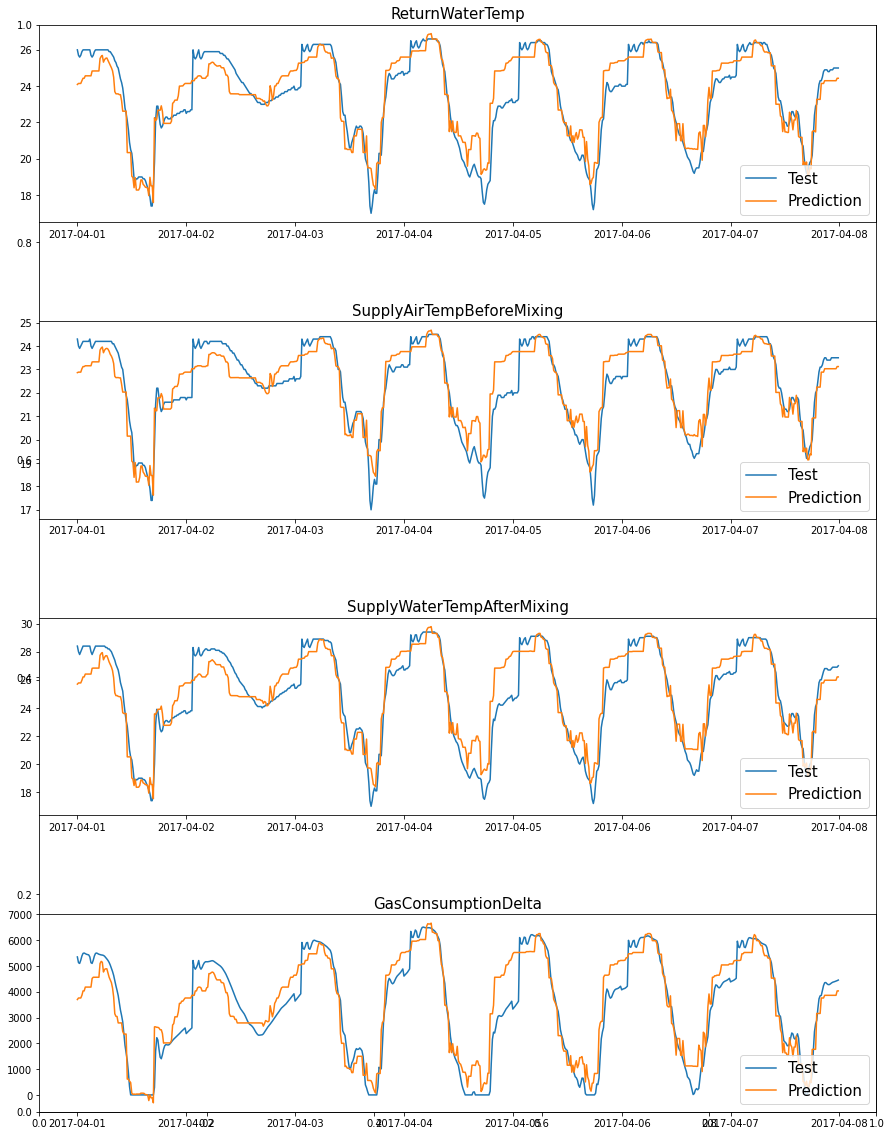

In [150]:
sub = 1
plt.figure()
f, axs = plt.subplots(figsize=(15, 20))
for i in y_train_multiple.columns:
    f.subplots_adjust(hspace=0.5)
    ax = f.add_subplot(len(y_train_multiple.columns), 1, sub)
    ax.set_title(i, fontsize = 15)
    ax.plot(y_test_multiple[i].iloc[0:week], label = "Test")
    ax.plot(prediction_tuned[i].iloc[0:week], label = "Prediction")
    ax.legend(prop={'size': 15})
    sub += 1
plt.show()

**As a result:**

We can see tjat the score is relatively good. It can be improved by tuning the hyperparameters, and also probably by scalling the data. However, the main issue here is an abrupt change of data at the junction of days (due to the electronics reboot). This can be improved by more carefull preprocessing of data. 

Now we predeict the ['SupplyAirTempAfterMixing']. Let's tune the model

In [151]:
# Find new parameters for the model for ['SupplyAirTempAfterMixing']:
parameters = {
              'learning_rate': [0.01, 0.02, 0.03], 
              'max_depth': [1,2,3,4],
              'min_child_weight': [2,3,4,5,7,9],
              'n_estimators': [300, 400, 500]}

xgb_grid = GridSearchCV(model_XGB, 
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

# Check on the 'SupplyAirTempAfterMixing' data:
xgb_grid.fit(X_train,
        y_train_modified['SupplyAirTempAfterMixing'])

xgb_grid.best_score_
xgb_grid.best_params_

Fitting 2 folds for each of 216 candidates, totalling 432 fits


{'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_weight': 7,
 'n_estimators': 500}

This is our model with parameters for the ['SupplyAirTempAfterMixing'] variable:

In [152]:
model_SupplyAirTempAfterMixing = XGBRegressor(n_estimators = 500, 
                                              learning_rate = 0.03, 
                                              max_depth = 3, 
                                              min_child_weight = 7,
                                              random_state=0 )

Fit the model and make predictions:

In [153]:
regressor_SupplyAirTempAfterMixing = model_SupplyAirTempAfterMixing.fit(X_train.values, 
                                                                        y_train_modified['SupplyAirTempAfterMixing'],
                                                                        verbose=False)

prediction_SupplyAirTempAfterMixing = regressor_SupplyAirTempAfterMixing.predict(X_test)

prediction_SupplyAirTempAfterMixing = pd.DataFrame(prediction_SupplyAirTempAfterMixing,
                                                   index = y_test.index,                                                                          
                                                   columns={'SupplyAirTempAfterMixing'})

Check the score:

In [154]:
cross_val_score(regressor_SupplyAirTempAfterMixing, 
                X_train, 
                y_train_modified['SupplyAirTempAfterMixing'],cv=5)

array([0.77207212, 0.95379727, 0.8971329 , 0.85451374, 0.54659435])

R2 score is not bad:

In [155]:
r2_score(y_test_modified['SupplyAirTempAfterMixing'], prediction_SupplyAirTempAfterMixing)

0.810854375066322

Plot the results:

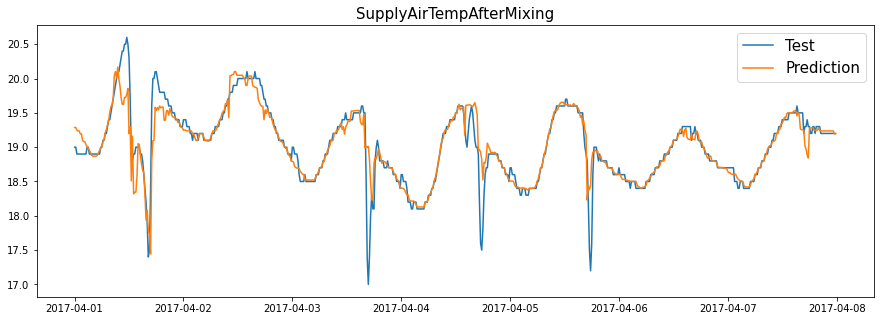

In [156]:
plt.figure(figsize=(15,5))
plt.plot(y_test_modified['SupplyAirTempAfterMixing'].iloc[0:week], label = "Test" )
plt.plot(prediction_SupplyAirTempAfterMixing.iloc[0:week], label = "Prediction")
plt.legend(fontsize = 15)
plt.title('SupplyAirTempAfterMixing', fontsize = 15)
plt.show()

# 4. Consider discrete variables: 
**['ActuatorDamper', 'ActuatorMixingValve', 'RoomTemp']**

Predicting these variables can be considered as a classification task:

In [157]:
y_train['ActuatorDamper'].unique()

array([0.6, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1])

In [158]:
y_train['ActuatorMixingValve'].unique()

array([0. , 0.1, 0.2])

In [159]:
y_train_modified['RoomTemp'].unique()

array([21. , 20.9, 20.8, 21.1, 20.7, 21.2])

The most easiest task is to predict the ['ActuatorMixingValve'] since there are only 2 possible values (excluding spikes at the begining of each day). It would be better to consider the data before modification:

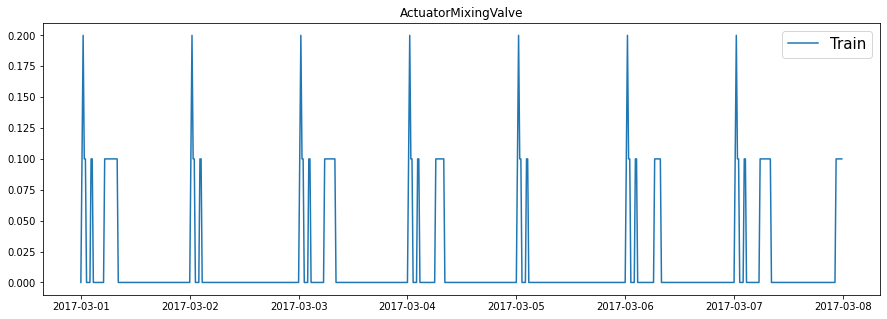

In [160]:
plt.figure(figsize=(15,5))
plt.plot(y_train['ActuatorMixingValve'].iloc[0:week], label = 'Train')
plt.title('ActuatorMixingValve')
plt.legend(fontsize = 15)
plt.show()

The first two spikes during each day are always the same, therefore, we can subtract them:

*y_valve_train* will be our data after subtraction

In [161]:
y_valve_train = y_train['ActuatorMixingValve'].copy()
subtract_time = 3*hour

for i in range(0, y_valve_train.size, day):
    y_valve_train[i:i+subtract_time] = 0            

Plot the data:

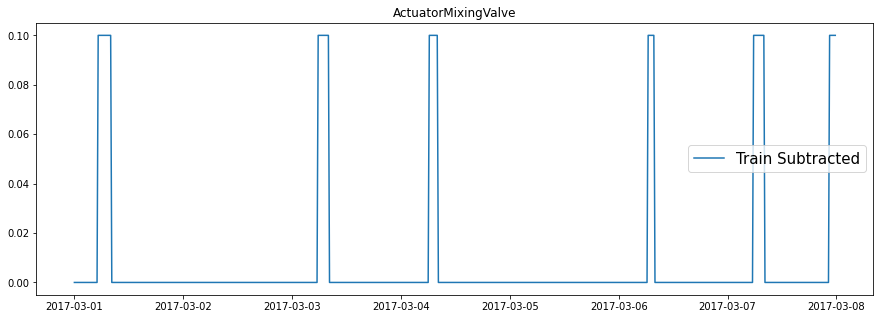

In [162]:
plt.figure(figsize=(15,5))
plt.plot(y_valve_train.iloc[0:week], label = 'Train Subtracted')
plt.title('ActuatorMixingValve')
plt.legend(fontsize = 15)
plt.show()

Let's try several models:

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [164]:
lr = LogisticRegression(random_state = 0)
rf = RandomForestClassifier(random_state = 0)
xgbc = XGBClassifier(random_state =0, use_label_encoder=False,eval_metric='logloss')

We need label encoding to use our train data for classification.

Apply it to subtracted data (*y_valve_train*):

In [165]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_valve_train)
y_encoded = y_encoded.astype(int)

In [199]:
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

Fit our models:

In [166]:
classifier_xgbc = xgbc.fit(X_train, y_encoded)
classifier_lr = lr.fit(X_train, y_encoded)
classifier_rf = rf.fit(X_train, y_encoded)

Make predictions

In [167]:
prediction_xgbc = classifier_xgbc.predict(X_test)
prediction_lr = classifier_lr.predict(X_test)
prediction_rf = classifier_rf.predict(X_test)

Convert the test *['ActuatorMixingValve']* data to the same shape as train data:

In [168]:
y_valve_test = y_test['ActuatorMixingValve'].copy()
subtract_time = 3*hour

for i in range(0, y_valve_train.size, day):
    y_valve_test[i:i+subtract_time] = 0 

Check the scores:

In [169]:
print('Cross validation scores \n')

lr_score = cross_val_score(classifier_lr, 
                            X_train, 
                            y_encoded,cv=5).mean()
print(f'classifier_lr: {lr_score}')

rf_score = cross_val_score(classifier_rf, 
                            X_train, 
                            y_encoded,cv=5).mean()
print(f'classifier_rf: {rf_score}')

xgbc_score = cross_val_score(classifier_xgbc, 
                            X_train, 
                            y_encoded,cv=5).mean()
print(f'classifier_xgbc: {xgbc_score}')

Cross validation scores 

classifier_lr: 0.9149305555555556
classifier_rf: 0.945138888888889
classifier_xgbc: 0.9444444444444443


Let's combine these models using an ensemble approach, namely, Voting Classifier

In [170]:
from sklearn.ensemble import VotingClassifier
# choose equal weights
weights = [1, 1, 1]
voting = VotingClassifier(estimators = [('lr',lr), ('rf',rf),('xgbc',xgbc)], voting = 'soft', weights = weights) 

The score of the Voting Classifier:

In [171]:
cv_voting = cross_val_score(voting, X_train, y_encoded, cv=5)
cv_voting.mean()

0.9458333333333334

Use this classifier for prediction:

In [172]:
classifier_voting = voting.fit(X_train, y_encoded)

In [173]:
prediction_voting = classifier_voting.predict(X_test)

Inverse transform predictions and turn them back to the pandas dataframe:

In [174]:
prediction_voting = lab_enc.inverse_transform(prediction_voting)

prediction_voting = pd.DataFrame(prediction_voting, 
                                index = y_test.index,                                                                          
                                columns={'ActuatorMixingValve'})

Let's plot the results for our Voting classifier 

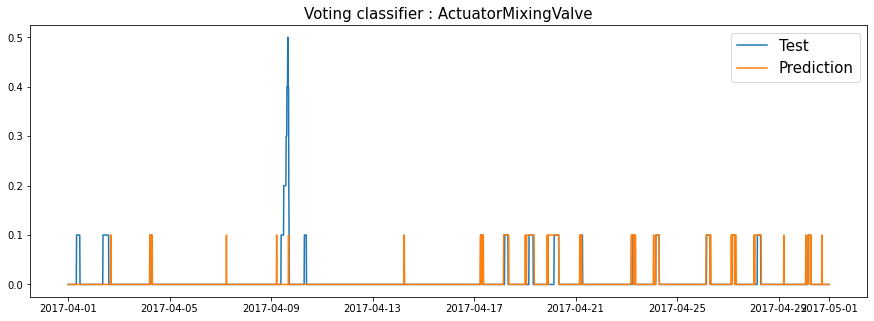

In [175]:
plt.figure(figsize=(15,5))
plt.plot(y_valve_test, label = "Test" )
plt.plot(prediction_voting, label = "Prediction")
plt.legend(fontsize = 15)
plt.title('Voting classifier : ActuatorMixingValve',fontsize = 15)
plt.show()

For comparison, the results with XGB Classifier are shown below, and it looks like the ensemble approach works better:

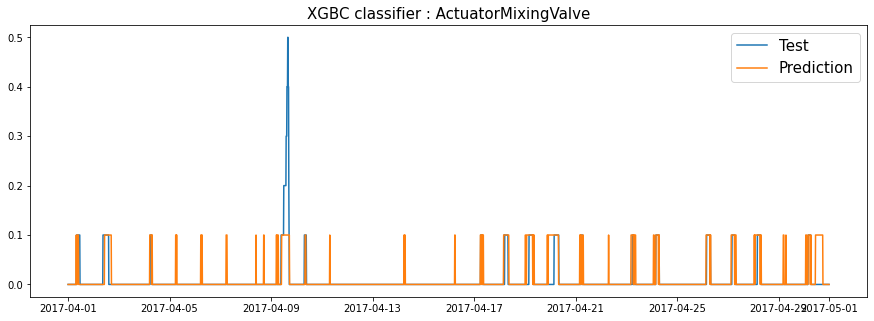

In [176]:
# Inverse transform predictions and turn them back to the pandas dataframe:
prediction_xgbc_converted = lab_enc.inverse_transform(prediction_xgbc)

prediction_xgbc_converted = pd.DataFrame(prediction_xgbc_converted, 
                                index = y_test.index,                                                                          
                                columns={'ActuatorMixingValve'})
# Plot the data
plt.figure(figsize=(15,5))
plt.plot(y_valve_test, label = "Test" )
plt.plot(prediction_xgbc_converted, label = "Prediction")
plt.legend(fontsize = 15)
plt.title('XGBC classifier : ActuatorMixingValve',fontsize = 15)
plt.show()

Here we see a large spike on 2017-04-09. Our model was build based only on the binarry classification task, and does not take into account such random spikes in the actuator.

# 5. Multi-Class Classification 

Finaly, let's predict the behaviour of another actuator: ['ActuatorDamper']

In [177]:
y_ActuatorDamper_train = y_train_modified['ActuatorDamper'].copy()
y_ActuatorDamperp_test = y_test_modified['ActuatorDamper'].copy()

This is already a multi-class classification task:

In [178]:
y_ActuatorDamper_train.unique()

array([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

Let's plot the data:

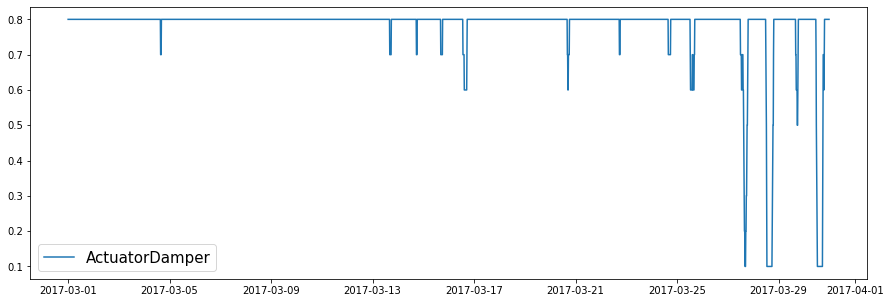

In [179]:
plt.figure(figsize=(15,5))
plt.plot(y_ActuatorDamper_train, label = "ActuatorDamper" )
plt.legend(fontsize = 15)
plt.show()

Use label encoding to encode the variable:

In [180]:
y_ActuatorDamper_encoded = lab_enc.fit_transform(y_ActuatorDamper_train) #lab_enc.values.reshape(-1, 1)

Now, it is encoded:

In [181]:
pd.DataFrame(y_ActuatorDamper_encoded)[0].unique()

array([7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [182]:
lab_enc.classes_

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

Let's use the XGB Classifier with parameter objective='multi:softprob' for our task:

In [183]:
model_multi = XGBClassifier(random_state=0, objective='multi:softprob', use_label_encoder=False, eval_metric = 'mlogloss')

Do fit-predict:

In [184]:
classifier_xgbc_ActuatorDamper = model_multi.fit(X_train, y_ActuatorDamper_encoded)

In [185]:
prediction_xgbc_ActuatorDamper = classifier_xgbc_ActuatorDamper.predict(X_test)

Predictions are now encoded:

In [186]:
pd.DataFrame(prediction_xgbc_ActuatorDamper)[0].unique()

array([7, 6, 0, 2, 5, 4], dtype=int64)

Decode them:

In [193]:
# Inverse transform predictions and turn them back to the pandas dataframe:
prediction_ActuatorDamper_dec = lab_enc.inverse_transform(prediction_xgbc_ActuatorDamper)

prediction_ActuatorDamper_dec = pd.DataFrame(prediction_ActuatorDamper_dec, 
                                index = y_test.index,                                                                          
                                columns={'ActuatorDamper'})

In [188]:
prediction_ActuatorDamper_dec.head()

,ActuatorMixingValve
2017-04-01 00:00:00,0.8
2017-04-01 00:15:00,0.8
2017-04-01 00:30:00,0.8
2017-04-01 00:45:00,0.8
2017-04-01 01:00:00,0.8


Check score:

In [189]:
print('Cross validation score for RoomTemp \n')
xgbc_score_ActuatorDamper = cross_val_score(model_multi, 
                            X_train, 
                            y_ActuatorDamper_encoded,cv=4).mean()
print(f'classifier_xgbc: {xgbc_score}')

Cross validation score for RoomTemp 

classifier_xgbc: 0.9444444444444443


Plot results:

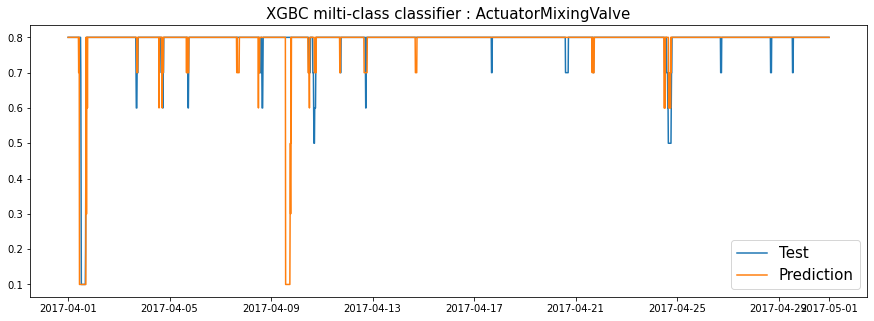

In [190]:
plt.figure(figsize=(15,5))
plt.plot(y_ActuatorDamperp_test , label = "Test" )
plt.plot(prediction_ActuatorDamper_dec, label = "Prediction")
plt.legend(fontsize = 15)
plt.title('XGBC milti-class classifier : ActuatorMixingValve',fontsize = 15)
plt.show()

In [194]:
prediction_ActuatorDamper_dec['ActuatorDamper'].values

array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8])

In [195]:
pd.DataFrame(y_ActuatorDamperp_test)['ActuatorDamper'].unique()      

array([0.8, 0.7, 0.4, 0.1, 0.2, 0.5, 0.6])

In [196]:
pd.crosstab(pd.Series(y_ActuatorDamperp_test).values,
            prediction_ActuatorDamper_dec['ActuatorDamper'].values, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.1,0.3,0.5,0.6,0.7,0.8,All
True,,,,,,,
0.1,16,0,0,0,0,0,16
0.2,1,0,0,0,0,0,1
0.4,1,0,0,0,0,0,1
0.5,1,0,0,7,2,5,15
0.6,0,0,0,0,11,9,20
0.7,1,0,0,4,19,58,82
0.8,22,4,2,5,34,2678,2745
All,42,4,2,16,66,2750,2880


Here it is also possible to tune hyperparameters of the classifier and get even better predictions.

# Summary

This task was subdivided into the sub-tasks. 

First, based on the correlation between the water and air temperatures, I predicted the variables ['SupplyWaterTempBeforeMixing'] and ['SetpointTempBoiler'] with R2-score of ~ 0.99. I showed that it is posible to use a multi output regressor to predict both variables at the same time.

Then, I subtracted periodic peaks probably appearing due to the reboot of electronics. These peaks are predictable without any model. I ussed a Grid Search to tune hyperparameters of the model and reach the R2-score of ~ 0.82 on variables ['ReturnWaterTemp', 'SupplyAirTempBeforeMixing', 'SupplyWaterTempAfterMixing', 'GasConsumptionDelta']. 

Tuning the hyperparameters of XGB Regressor, I predicted the variable ['SupplyAirTempAfterMixing'] with R2-score of ~ 0.81.

Prediction of the actuator's state is a classification task. I used an ensemble approach (Voting Classifier) to predict behaviour of ['ActuatorDamper'] with cross-validation score of ~ 0.95.

Finally, to predict the behaviour of actuator with more that two states ['ActuatorDamper'], the multi-class classification approach was demonstrated.